In [1]:
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt
import math
import numpy as np
from pylab import rcParams
import matplotlib
from numpy import trapz
import pandas as pd

In [2]:
rcParams["figure.figsize"]=10, 2.5
matplotlib.rcParams["figure.facecolor"] = "0.9"
matplotlib.rcParams["figure.dpi"] = 100
matplotlib.rcParams["font.size"] = 15

In [3]:
NMR= pd.read_csv("./PUZ-488-ReT.csv", header = None, skiprows = 0, sep = "\t")

In [4]:
NMR.columns = ["CS", "intensity", "1"]
print(NMR)

             CS  intensity   1
0      -5.02151   0.947668 NaN
1      -5.02113  -0.332421 NaN
2      -5.02074  -0.839016 NaN
3      -5.02036   0.797775 NaN
4      -5.01998   3.201000 NaN
...         ...        ...  ..
52425  15.02000  -0.867080 NaN
52426  15.02040  -2.205660 NaN
52427  15.02080  -1.870570 NaN
52428  15.02120  -0.090031 NaN
52429  15.02160   1.419430 NaN

[52430 rows x 3 columns]


In [18]:
#integeration minimum chemcial shift value of DCM
P1 = [n for n, i in enumerate (NMR.CS) if i>5.4][0]
print("P1 =", P1)
P2 = [n for n, i in enumerate (NMR.CS) if i>5.45][0]
print("P2 =", P2)

P1 = 27261
P2 = 27392


In [19]:
Average_P1 = (NMR.intensity[P1-2]+NMR.intensity[P1-1]+NMR.intensity[P1]+NMR.intensity[P1+1]+NMR.intensity[P1+2])/5
Average_P2 = (NMR.intensity[P2-2]+NMR.intensity[P2-1]+NMR.intensity[P2]+NMR.intensity[P2+1]+NMR.intensity[P2+2])/5
Intensity_min_DCM = (Average_P1+Average_P2)/2
NMR_intensity_corr_DCM = NMR.intensity-Intensity_min_DCM

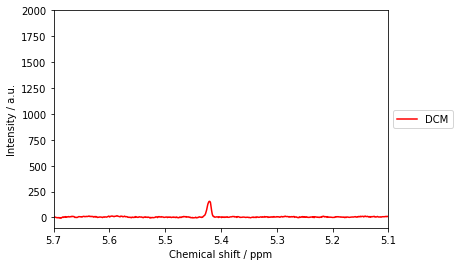

In [20]:
fig, ax = plt.subplots()
ax.plot(NMR.CS, NMR_intensity_corr_DCM, "r", label='DCM')
ax.set_xlim(5.7, 5.1)
ax.set_ylim(-100, 2000)
ax.set_xlabel('Chemical shift / ppm')
ax.set_ylabel('Intensity / a.u.')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [21]:
Peak_int_NMR_DCM = trapz (NMR_intensity_corr_DCM[P1:P2], dx = 1)
print("DCM peak area =", Peak_int_NMR_DCM)

DCM peak area = 3902.2395203


In [22]:
#integeration minimum chemcial shift value of formate
P3 = [n for n, i in enumerate (NMR.CS) if i>8.35][0]
print("P3 =", P3)
P4 = [n for n, i in enumerate (NMR.CS) if i>8.45][0]
print("P4 =", P4)

P3 = 34978
P4 = 35240


In [23]:
Average_P3 = (NMR.intensity[P3-2]+NMR.intensity[P3-1]+NMR.intensity[P3]+NMR.intensity[P3+1]+NMR.intensity[P3+2])/5
Average_P4 = (NMR.intensity[P4-2]+NMR.intensity[P4-1]+NMR.intensity[P4]+NMR.intensity[P4+1]+NMR.intensity[P4+2])/5
Intensity_min_formate = (Average_P3+Average_P4)/2
NMR_intensity_corr_formate = NMR.intensity-Intensity_min_formate

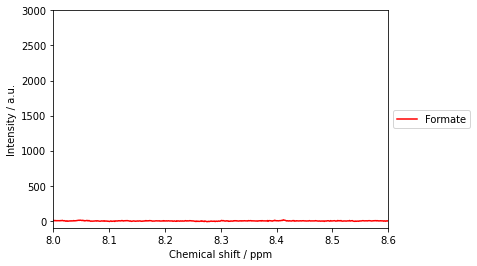

In [24]:
fig, ax = plt.subplots()
ax.plot(NMR.CS, NMR_intensity_corr_formate, "r", label='Formate')
ax.set_xlim(8.0, 8.6)
ax.set_ylim(-100, 3000)
ax.set_xlabel('Chemical shift / ppm')
ax.set_ylabel('Intensity / a.u.')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [25]:
Peak_int_NMR_formate = trapz (NMR_intensity_corr_formate[P3:P4], dx = 1)
print("Formate peak area =", Peak_int_NMR_formate)

Formate peak area = -8.894604429999958


In [26]:
Ratio = Peak_int_NMR_formate/Peak_int_NMR_DCM
print("Formate/DCM =", Ratio)

Formate/DCM = -0.0022793589126779566


In [27]:
Peak_int_sum = []
Peak_int_sum.append(Peak_int_NMR_formate)
Peak_int_sum.append(Peak_int_NMR_DCM)
Peak_int_sum.append(Ratio)

In [28]:
name = ["formate peak area", "DCM peak area", "formate/DCM ratio"]

In [29]:
output_data = pd.DataFrame({"name":name, "peak_area":Peak_int_sum})

In [30]:
output_data

,name,peak_area
0,formate peak area,-8.894604
1,DCM peak area,3902.239520
2,formate/DCM ratio,-0.002279
